In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
df=df.drop("Loan_ID",axis=1)

### EDA

In [7]:
categorical_attributes=["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area", "Loan_Status"]

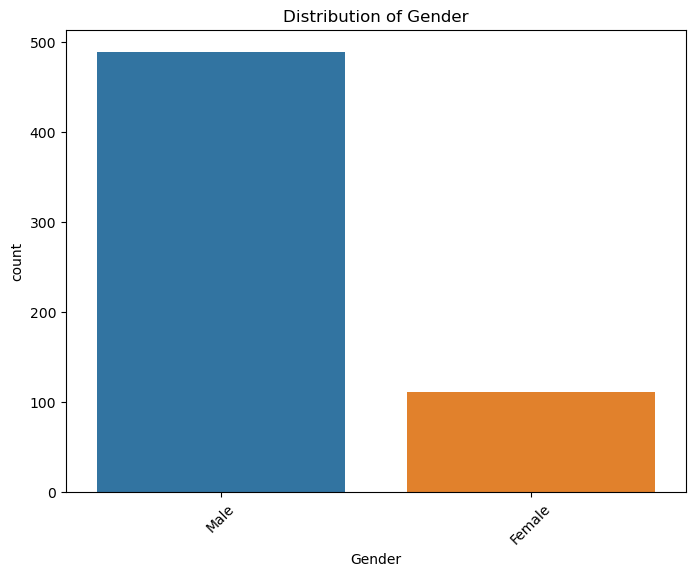

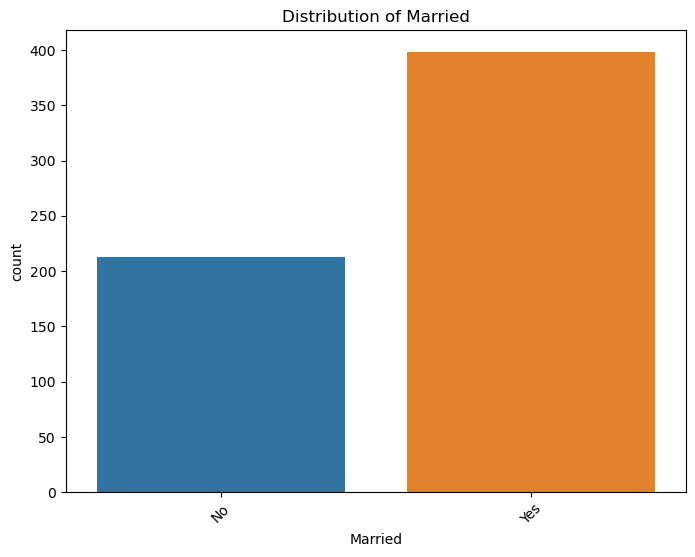

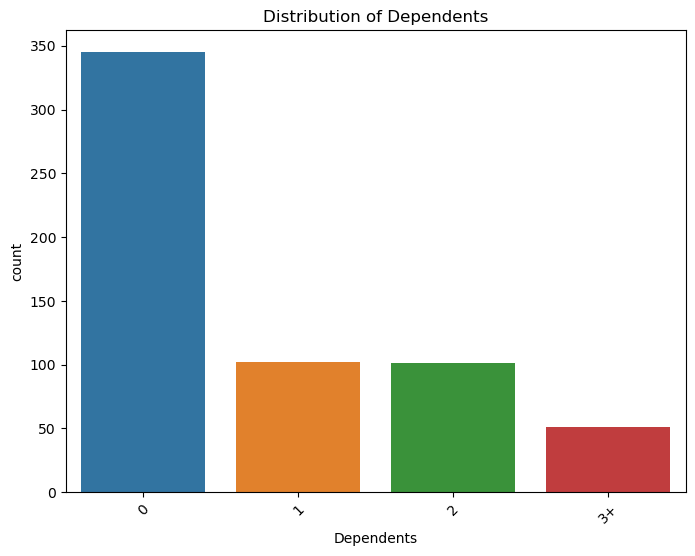

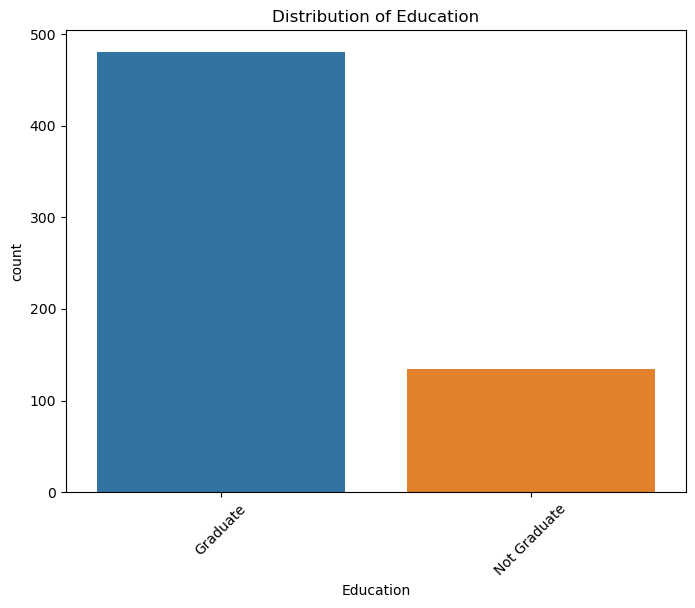

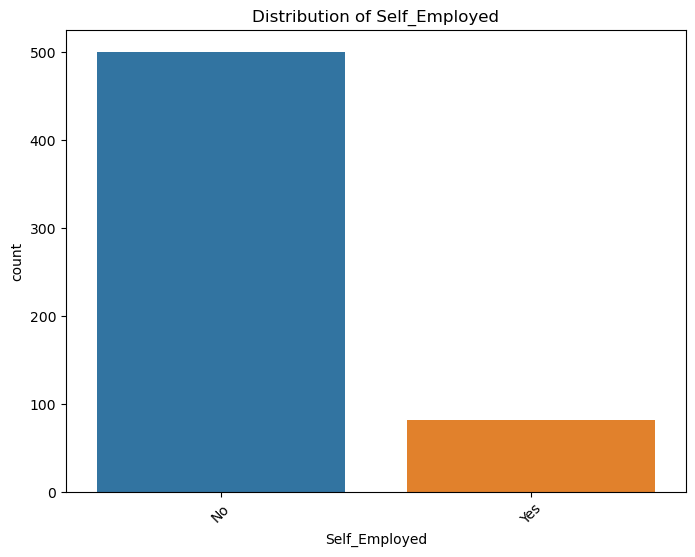

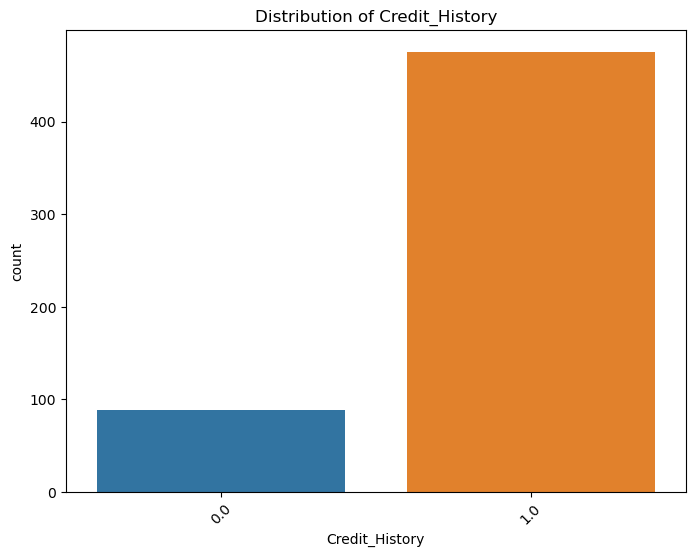

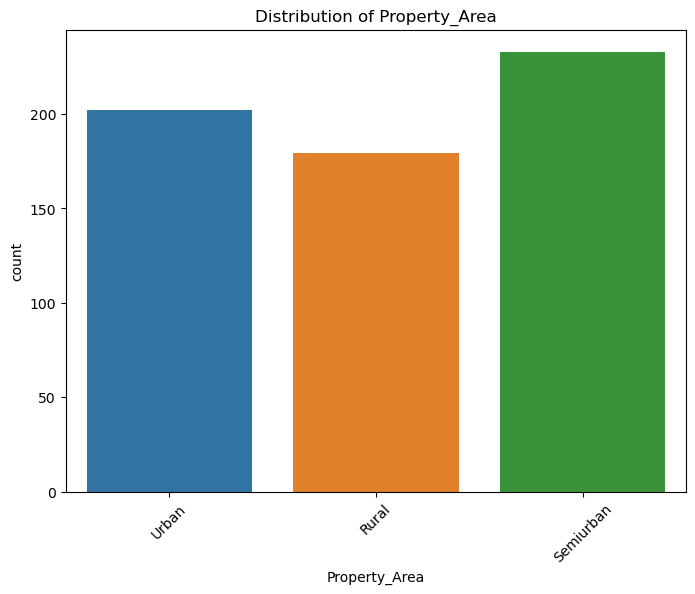

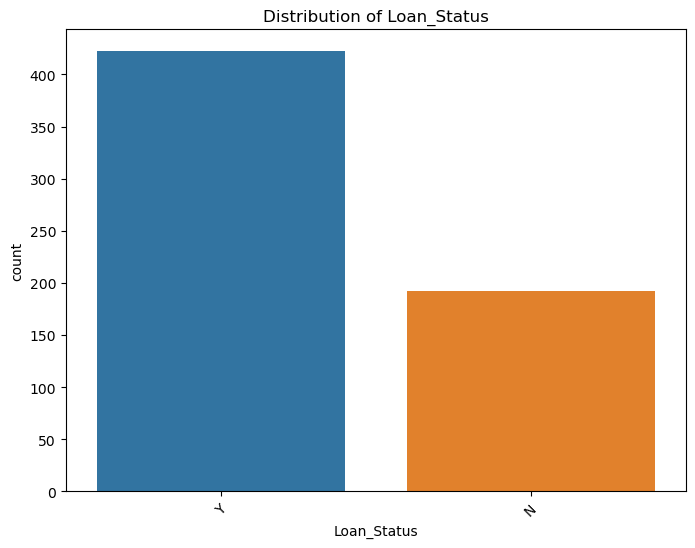

In [8]:
for attribute in categorical_attributes:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=attribute)
    plt.title(f"Distribution of {attribute}")
    plt.xlabel(attribute)
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.show()

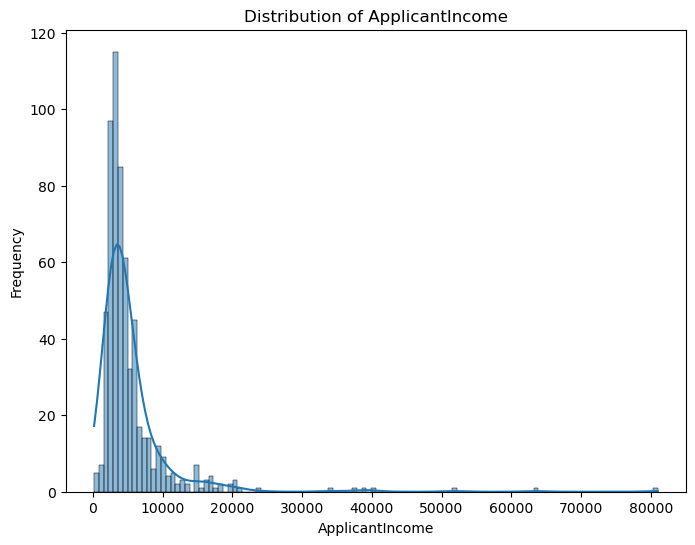

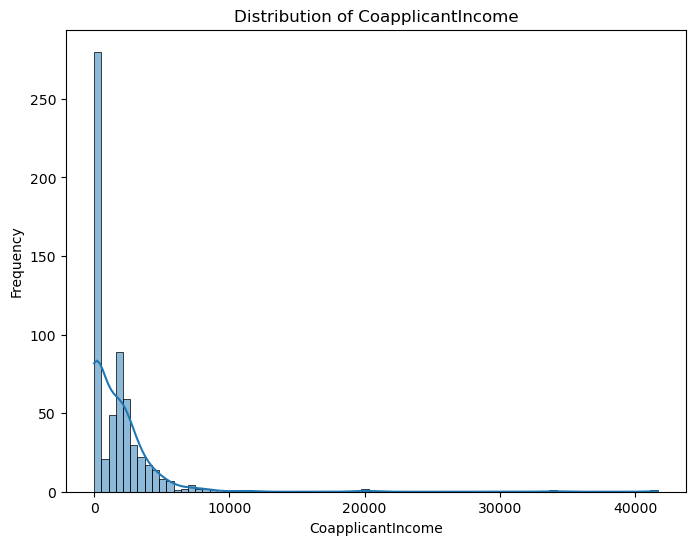

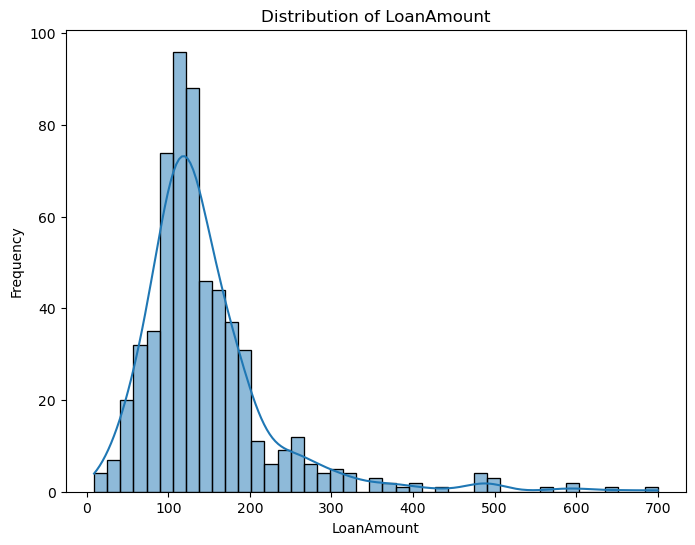

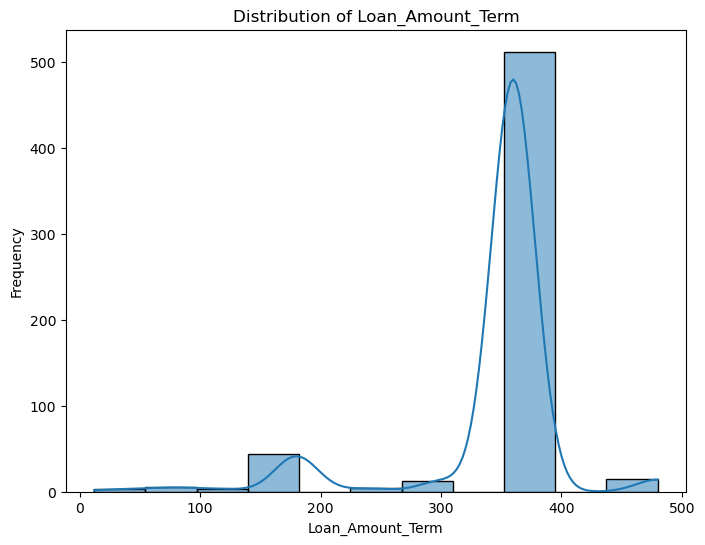

In [9]:
continuous_attributes = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
for attribute in continuous_attributes:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=attribute, kde=True)
    plt.title(f"Distribution of {attribute}")
    plt.xlabel(attribute)
    plt.ylabel("Frequency")
    plt.show()

In [10]:
# sns.histplot(data=df, x=np.log(df["ApplicantIncome"]), kde=True)
# sns.histplot(data=df, x=np.log(df["CoapplicantIncome"]), kde=True)
# sns.histplot(data=df, x=np.log(df["LoanAmount"]), kde=True)

<Figure size 800x600 with 0 Axes>

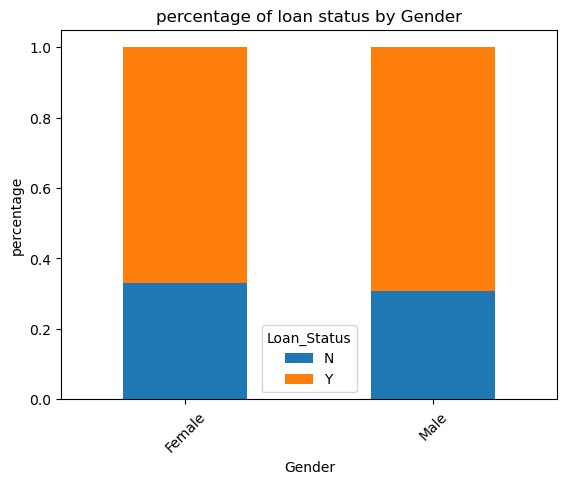

<Figure size 800x600 with 0 Axes>

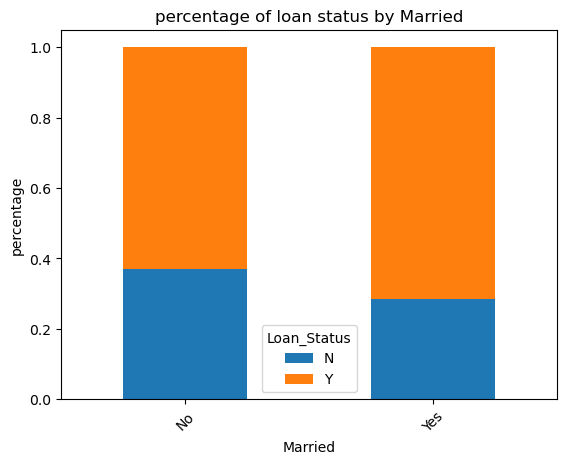

<Figure size 800x600 with 0 Axes>

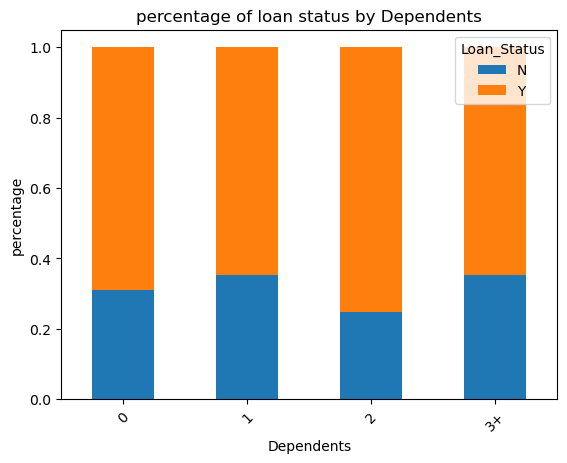

<Figure size 800x600 with 0 Axes>

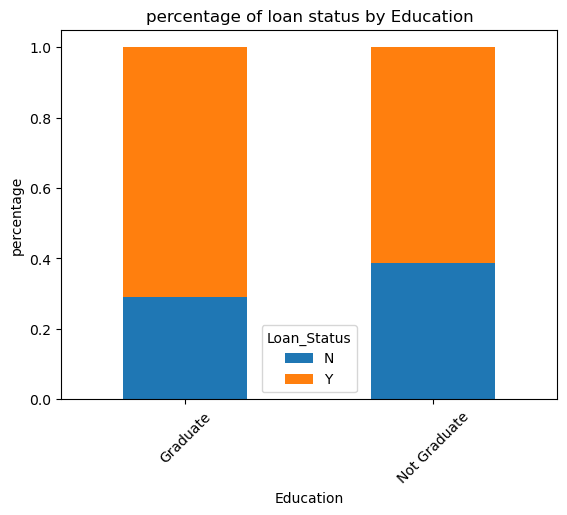

<Figure size 800x600 with 0 Axes>

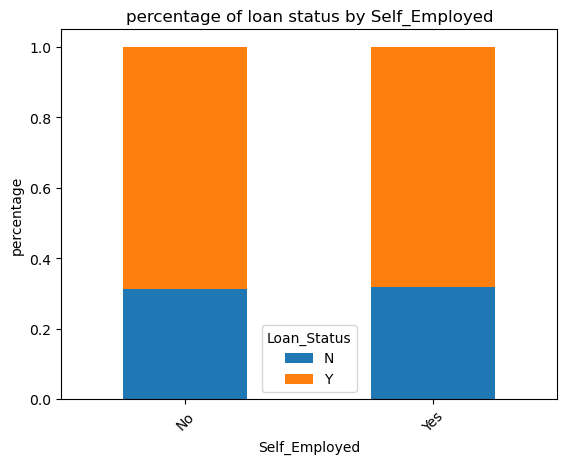

<Figure size 800x600 with 0 Axes>

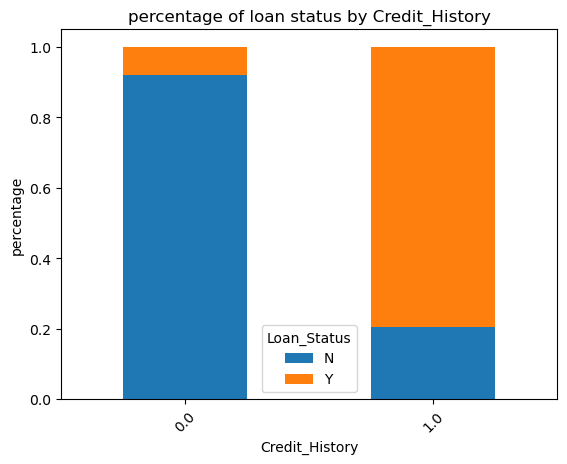

<Figure size 800x600 with 0 Axes>

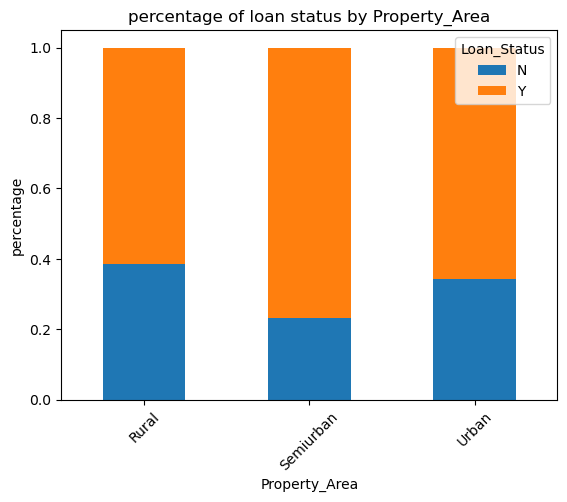

<Figure size 800x600 with 0 Axes>

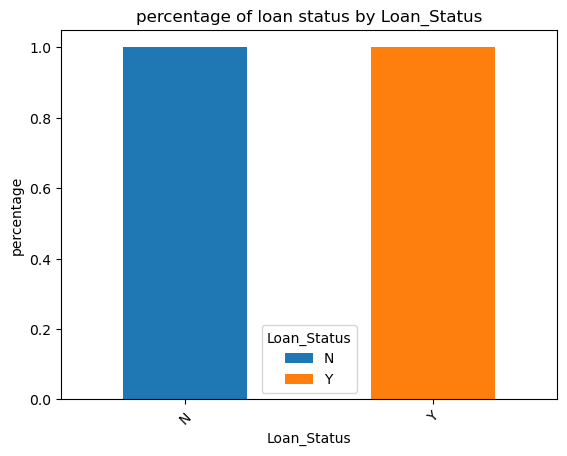

In [11]:
for attribute in categorical_attributes:
    plt.figure(figsize=(8,6))
    cross_tab = pd.crosstab(df[attribute], df['Loan_Status'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f"percentage of loan status by {attribute}")
    plt.xlabel(attribute)
    plt.ylabel("percentage")
    plt.xticks(rotation=45)
    plt.show()

C:\Users\keden\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


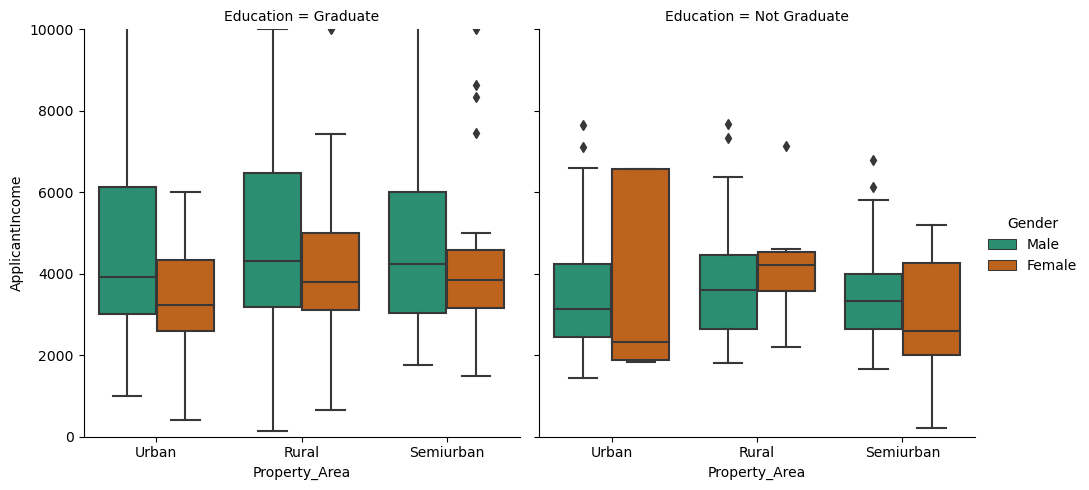

In [12]:
sns.catplot(x='Property_Area',y='ApplicantIncome',data=df,kind='box',col='Education',hue='Gender',palette='Dark2')
plt.ylim(0,10000)
plt.show()

C:\Users\keden\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


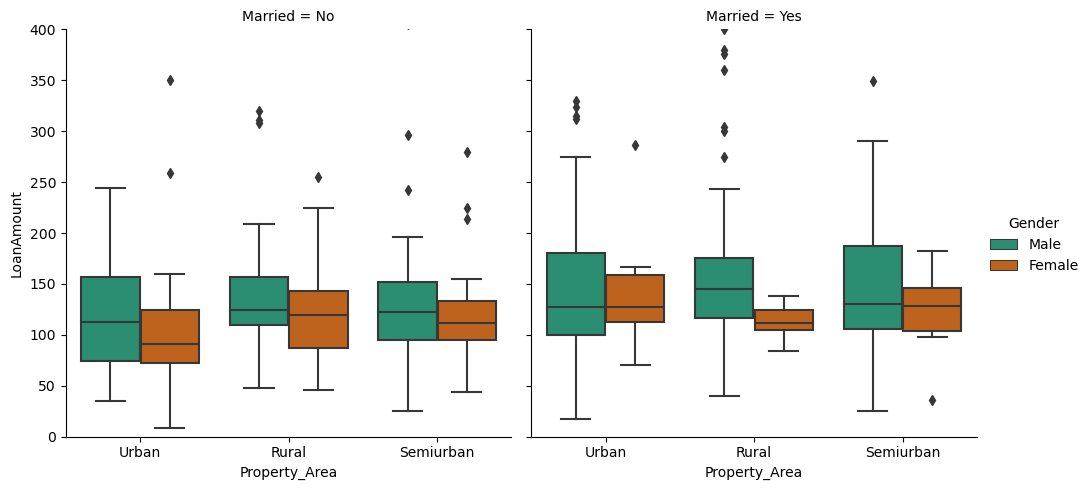

In [13]:
sns.catplot(x='Property_Area',y='LoanAmount',data=df,kind='box',col='Married',hue='Gender',palette='Dark2')
plt.ylim(0,400)
plt.show()

C:\Users\keden\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


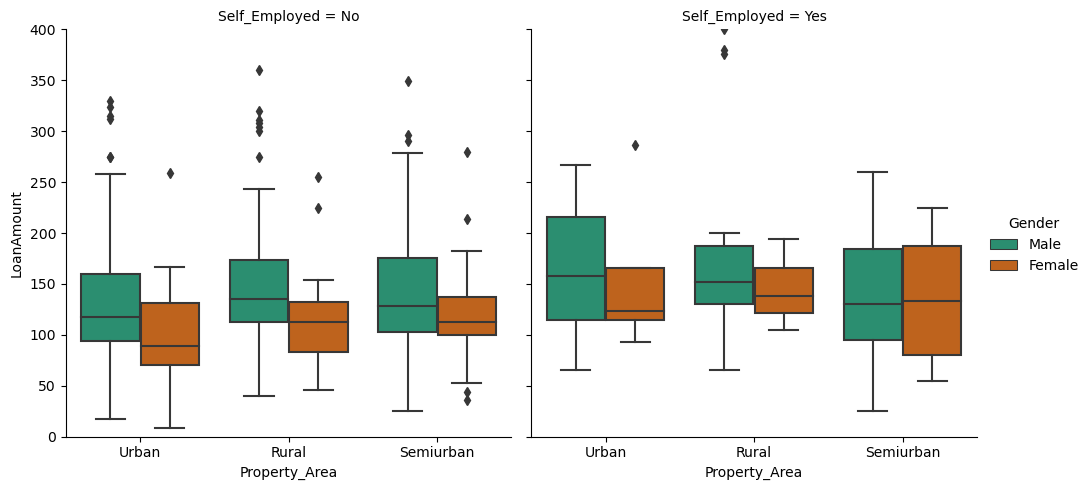

In [14]:
sns.catplot(x='Property_Area',y='LoanAmount',data=df,kind='box',col='Self_Employed',hue='Gender',palette='Dark2')
plt.ylim(0,400)
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

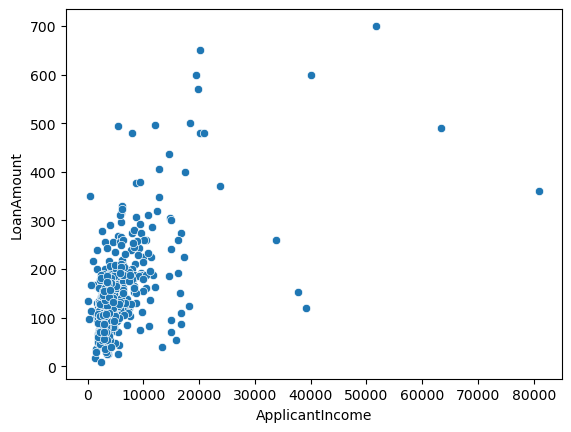

In [15]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount')

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

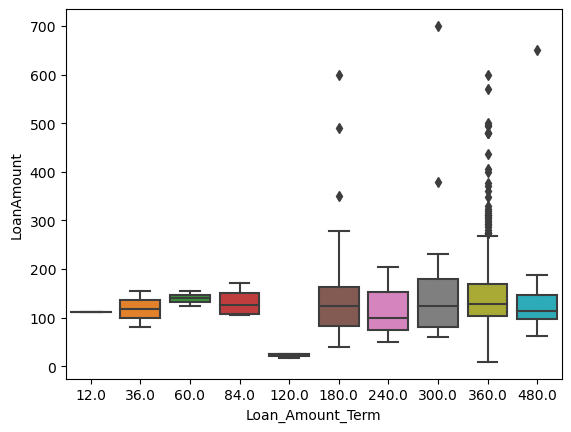

In [16]:
sns.boxplot(data=df, x="Loan_Amount_Term", y='LoanAmount')

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

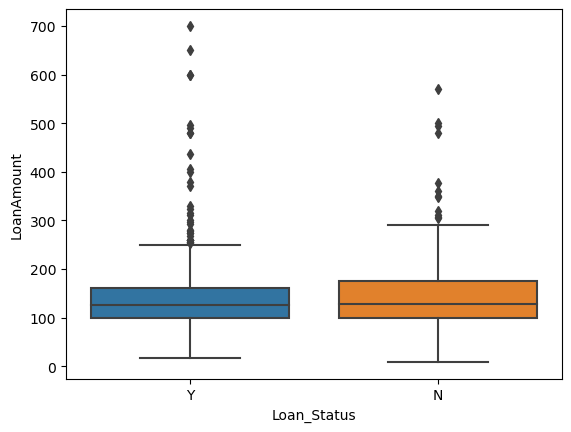

In [17]:
sns.boxplot(data=df,x="Loan_Status",y="LoanAmount")

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

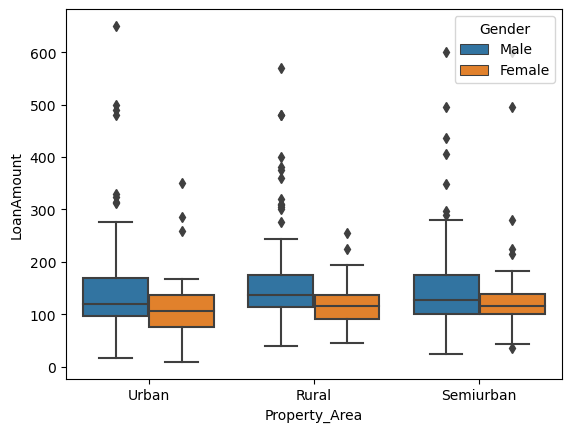

In [18]:
sns.boxplot(data=df, x="Property_Area", y='LoanAmount',hue="Gender")

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

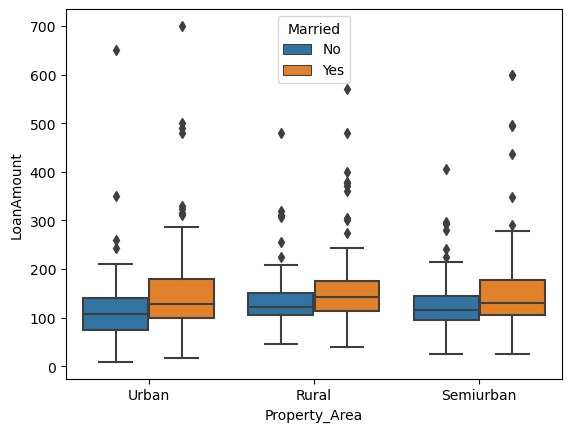

In [19]:
sns.boxplot(data=df, x="Property_Area", y='LoanAmount',hue="Married")

<Axes: >

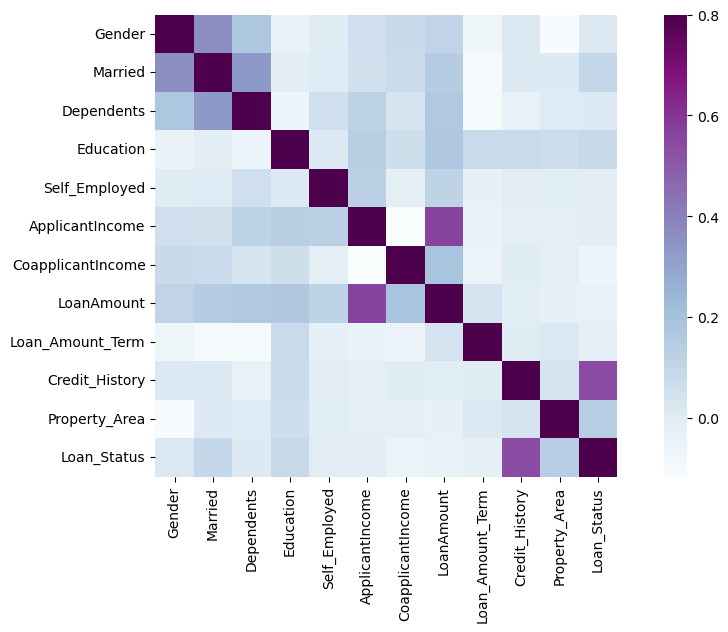

In [163]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), vmax=0.8, square=True,cmap='BuPu')

### data cleaning

#### 1. for categorical variables, use mode; for numercial variable, use KNN imputation

In [22]:
df=df.drop(['Total_Income', 'Total_Income_bin'], axis=1)

In [23]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
columns=["Gender","Married","Dependents","Self_Employed"]
for column in columns:
    df[column].fillna(df[column].mode()[0],inplace=True)

In [25]:
# df.isnull().sum()

In [26]:
from sklearn.impute import KNNImputer

In [27]:
imputer=KNNImputer(n_neighbors=5)
df['LoanAmount']=imputer.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term'] = imputer.fit_transform(df[['Loan_Amount_Term']])
df['Credit_History'] = imputer.fit_transform(df[['Credit_History']])

In [28]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
df["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [30]:
df["Dependents"].replace("3+",3,inplace=True)

In [31]:
df["Dependents"].unique()

array(['0', '1', '2', 3], dtype=object)

In [212]:
# df.head()

In [33]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0}).astype('int')
df['Married'] = df['Married'].map({'Yes':1,'No':0}).astype('int')
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [35]:
df["Loan_Status"].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [167]:
# df.info()

## Train | Test Split

In [78]:
X = df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [81]:
scaler = StandardScaler()

In [82]:
cols = ['ApplicantIncome',"CoapplicantIncome",'LoanAmount', 'Loan_Amount_Term']

In [83]:
X_train[cols]= scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [85]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
382,0,0,0,1,0,0.090389,-0.540405,0.119157,0.287419,1.0,1
597,1,0,0,1,0,-0.368671,-0.540405,-0.696761,0.287419,0.0,2
388,1,1,0,1,0,-0.468315,0.225251,-0.120819,0.287419,1.0,1
278,1,1,0,1,0,1.398093,-0.540405,3.478818,0.287419,1.0,2
31,1,0,0,1,0,-0.341247,-0.540405,-0.864744,0.287419,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,0,-0.252421,-0.540405,-0.396791,2.146743,1.0,1
599,1,1,2,1,0,0.056870,-0.540405,0.551113,0.287419,1.0,1
575,1,1,2,1,0,-0.342465,-0.394370,-0.456785,-3.989026,1.0,1
337,1,1,2,1,1,-0.442871,0.916781,0.359133,0.287419,1.0,0


In [ ]:
smote = SMOTE(random_state=101)
X_train_SMOTE, y_train_SMOTE= smote.fit_resample(X_train, y_train)

### 0.baseline accuracy

In [126]:
422/(422+192)

0.6872964169381107

### 1. logistic regression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [105]:
logreg=LogisticRegression(class_weight="balanced")

In [106]:
C_values =np.linspace(0.01, 1, 50)

In [107]:
param_grid = {'C': C_values}

In [108]:
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ])},
             scoring='accuracy')

In [109]:
print("Best parameters: ", grid_search.best_params_,"Best score", grid_search.best_score_)

Best parameters:  {'C': 0.39387755102040817} Best score 0.7454339311482168


### 2. SVM

In [110]:
from sklearn.svm import SVC

In [111]:
svc = SVC(class_weight='balanced')

In [112]:
param_grid = {'C':np.linspace(0.1,1,50),
              'gamma':['scale','auto'],
             "kernel":["linear","rbf"]}

In [113]:
grid_search = GridSearchCV(svc,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46734694, 0.48571429, 0.50408163, 0.52244898, 0.54081633,
       0.55918367, 0.57755102, 0.59591837, 0.61428571, 0.63265306,
       0.65102041, 0.66938776, 0.6877551 , 0.70612245, 0.7244898 ,
       0.74285714, 0.76122449, 0.77959184, 0.79795918, 0.81632653,
       0.83469388, 0.85306122, 0.87142857, 0.88979592, 0.90816327,
       0.92653061, 0.94489796, 0.96326531, 0.98163265, 1.        ]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [114]:
print("Best parameters: ", grid_search.best_params_,"Best score", grid_search.best_score_)

Best parameters:  {'C': 0.5224489795918368, 'gamma': 'scale', 'kernel': 'linear'} Best score 0.8167594310451453


### 3. Decsion Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
tree=DecisionTreeClassifier()

In [121]:
param_grid = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2,3,4],
    'max_leaf_nodes': [10, 20, 30, 40, 50]
}

In [122]:
grid_search=GridSearchCV(tree,param_grid,cv=5,scoring="accuracy")
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'max_leaf_nodes': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [123]:
print("Best parameters: ", grid_search.best_params_,"Best score", grid_search.best_score_)

Best parameters:  {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 2} Best score 0.8045351473922903


### 4,KNN

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
knn = KNeighborsClassifier(p=1)

In [156]:
param_grid = {
    'n_neighbors': list(range(1, 5)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(1, 50, 5)),
    'p': [1, 2]
}

In [157]:
grid_search=GridSearchCV(knn,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train_SMOTE,y_train_SMOTE)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(p=1),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'n_neighbors': [1, 2, 3, 4], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [158]:
print("Best parameters: ", grid_search.best_params_,"Best score", grid_search.best_score_)

Best parameters:  {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'} Best score 0.8140696075320004


### 5. random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rf = RandomForestClassifier()

In [193]:
param_grid = {
    'n_estimators': [70,75,80,90,100,120,150],
    'max_features': [2,3,4],
    'max_depth': [2,5,10],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,3],
    'bootstrap': [True]
}

In [194]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 567 candidates, totalling 2835 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 5, 10],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [70, 75, 80, 90, 100, 120, 150]},
             scoring='accuracy', verbose=2)

In [195]:
print("Best parameters: ", grid_search.best_params_,"Best score", grid_search.best_score_)

Best parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80} Best score 0.8147186147186147


### evaluation

In [179]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [186]:
model = SVC(C=0.522, gamma='scale', kernel='linear')

In [187]:
model.fit(X_train, y_train)

SVC(C=0.522, kernel='linear')

In [188]:
y_pred = model.predict(X_test)

In [189]:
print("Classification Report", classification_report(y_test, y_pred))

Classification Report               precision    recall  f1-score   support

           0       0.95      0.47      0.63        45
           1       0.76      0.99      0.86        78

    accuracy                           0.80       123
   macro avg       0.86      0.73      0.74       123
weighted avg       0.83      0.80      0.77       123



In [200]:
fi= pd.DataFrame({'feature': X_train.columns, 'importance': model.coef_[0]})
fi= fi.sort_values(by='importance', ascending=False)
fi

,feature,importance
9,Credit_History,2.000168
0,Gender,0.000109
1,Married,0.000070
8,Loan_Amount_Term,0.000024
4,Self_Employed,0.000008
2,Dependents,-0.000003
10,Property_Area,-0.000014
3,Education,-0.000015
6,CoapplicantIncome,-0.000026
7,LoanAmount,-0.000031


### evaluation for rf

In [206]:
rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=2,
    max_features=3,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=80,
    random_state=42  
)

In [207]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=3, n_estimators=80,
                       random_state=42)

In [208]:
y_pred=rf_model.predict(X_test)

In [209]:
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.95      0.47      0.63        45
           1       0.76      0.99      0.86        78

    accuracy                           0.80       123
   macro avg       0.86      0.73      0.74       123
weighted avg       0.83      0.80      0.77       123



In [211]:
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
9,Credit_History,0.461637
7,LoanAmount,0.109889
10,Property_Area,0.099993
6,CoapplicantIncome,0.088426
5,ApplicantIncome,0.082304
3,Education,0.056462
8,Loan_Amount_Term,0.049217
2,Dependents,0.029057
1,Married,0.012176
0,Gender,0.008689
